In [208]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import pairwise_distances
import plotly.express as px
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


import joblib
import warnings
warnings.filterwarnings(action='ignore') 

In [209]:
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
# display(HTML("<style>.prompt { display:none !important; }</style>"))

### Load Data & EDA

In [210]:
train_data = pd.read_csv("./dataset/train_data.csv")

In [211]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   out_pressure   2463 non-null   float64
 3   motor_current  2463 non-null   float64
 4   motor_rpm      2463 non-null   int64  
 5   motor_temp     2463 non-null   float64
 6   motor_vibe     2463 non-null   float64
 7   type           2463 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 154.1 KB


In [212]:
train_data.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386,2.230113
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000


In [213]:
# train_data.profile_report()

In [214]:
X_train = train_data.iloc[:,:-1]
y_train = train_data[['type']]

In [215]:
X_train.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000


In [216]:
X_train.columns

Index(['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe'],
      dtype='object')

### Scaling

In [217]:
sc = StandardScaler()
# sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)

In [218]:
X_train_sc[0]

array([-4.48257396e-01, -9.17212397e-01, -1.11022302e-16, -5.11748204e-01,
       -1.00704610e+00, -9.10351446e-01, -3.31821181e-01])

In [219]:
scaled_df = pd.DataFrame(X_train_sc, columns=X_train.columns)
scaled_df.head(3)

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
0,-0.448257,-0.917212,-1.110223e-16,-0.511748,-1.007046,-0.910351,-0.331821
1,0.699749,1.178320,-1.110223e-16,0.802045,1.118785,1.172883,0.188462
2,-0.182053,-0.425427,-1.110223e-16,-0.202966,-0.508305,-0.421612,-0.211268


In [220]:
scaled_df.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
count,2.463000e+03,2.463000e+03,2.463000e+03,2.463000e+03,2.463000e+03,2.463000e+03,2.463000e+03
mean,-1.615526e-16,8.654601e-16,-1.110223e-16,-6.923681e-17,-1.038552e-16,-1.044322e-15,-5.942826e-16
std,1.000203e+00,1.000203e+00,0.000000e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00
min,-1.496437e+00,-1.945491e+00,-1.110223e-16,-1.628509e+00,-1.703539e+00,-1.976342e+00,-9.409328e-01
25%,-7.061429e-01,-8.484312e-01,-1.110223e-16,-7.631849e-01,-8.550972e-01,-8.487780e-01,-3.635457e-01
50%,-1.404585e-01,-2.423025e-03,-1.110223e-16,-1.206245e-01,-2.119569e-02,-1.625376e-02,-1.224390e-01
75%,5.749659e-01,8.430120e-01,-1.110223e-16,6.255983e-01,8.701410e-01,8.348708e-01,1.757719e-01
max,3.403388e+00,1.829448e+00,-1.110223e-16,3.272300e+00,1.732397e+00,1.892523e+00,1.168544e+01


### Correlation Review
- PCA 차원축소릃 할 때, 강한 상관관계를 갖는 속성끼리 묶어서 수행하겠다.
- 차원축소 그룹핑
-- 1그룹 : air_inflow, motor_current, motor_vibe
-- 2그룹 : air_end_temp, motor_rpm, motor_temp
-- 3그룹 : out_pressure
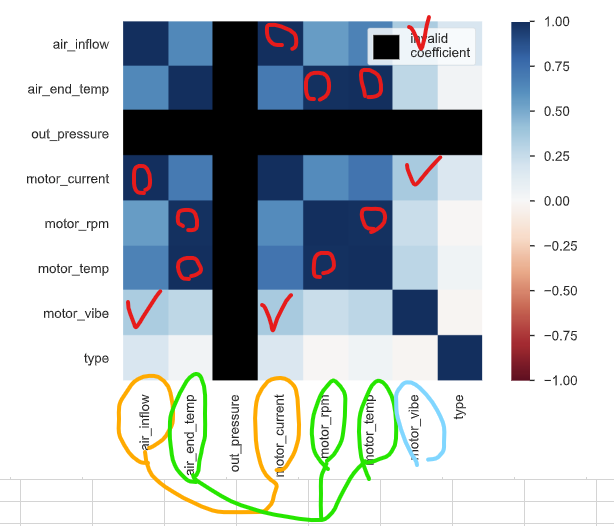

In [221]:
# PCA 대상 그룹핑으로 나누기
g1 = scaled_df[['air_inflow','motor_current']]
g2 = scaled_df[['air_end_temp', 'motor_rpm', 'motor_temp']]
g3 = scaled_df[['motor_vibe', 'out_pressure']]
combined = [g1, g2, g3]

### PCA Decomposition

In [222]:
pca = PCA(n_components=1)
pca_list = []
for i in combined:
    result = pca.fit_transform(i)
    pca_list.append(result)
    total_var = pca.explained_variance_ratio_.sum() * 100
    print(f"{i}total_var : {total_var}")

      air_inflow  motor_current
0      -0.448257      -0.511748
1       0.699749       0.802045
2      -0.182053      -0.202966
3       0.200616       0.230799
4      -0.190372      -0.208848
...          ...            ...
2458    0.125746       0.149927
2459   -0.073907      -0.084600
2460   -0.781013      -0.889638
2461   -0.764375      -0.871259
2462    0.491777       0.566048

[2463 rows x 2 columns]total_var : 99.72924966859087
      air_end_temp  motor_rpm  motor_temp
0        -0.917212  -1.007046   -0.910351
1         1.178320   1.118785    1.172883
2        -0.425427  -0.508305   -0.421612
3         0.266970   0.194005    0.265958
4        -0.434598  -0.517029   -0.430592
...            ...        ...         ...
2458      0.137432   0.063140    0.137680
2459     -0.236279  -0.316369   -0.234326
2460     -1.520194  -1.619204   -1.510693
2461     -1.490389  -1.588669   -1.481189
2462      0.801170   0.736368    0.798312

[2463 rows x 3 columns]total_var : 99.4720531485624
     

In [223]:
pca_list[0]

array([[-0.67882647],
       [ 1.061929  ],
       [-0.27224975],
       ...,
       [-1.1813289 ],
       [-1.15656768],
       [ 0.74799495]])

In [224]:
# 2D 리스트를 1D로 Flatten
flat_pca_list = []
for i in pca_list:
    result = [j for sub in i for j in sub]
    flat_pca_list.append(result)

In [225]:
# flat_pca_list[0]

In [226]:
pca_df = pd.DataFrame({"PC1": flat_pca_list[0], "PC2": flat_pca_list[1], "PC3": flat_pca_list[2]})
pca_df.head()

,PC1,PC2,PC3
0,-0.678826,1.636428,-0.331821
1,1.061929,-2.003479,0.188462
2,-0.272250,0.782386,-0.211268
3,0.305056,-0.419799,-0.039955
4,-0.282291,0.797902,-0.211268


In [227]:
y_train.head()

,type
0,0
1,0
2,0
3,0
4,0


In [228]:
pca_train = pd.concat([pca_df, y_train], axis=1)
pca_train.head()

,PC1,PC2,PC3,type
0,-0.678826,1.636428,-0.331821,0
1,1.061929,-2.003479,0.188462,0
2,-0.272250,0.782386,-0.211268,0
3,0.305056,-0.419799,-0.039955,0
4,-0.282291,0.797902,-0.211268,0


In [229]:
pca_train.describe()

,PC1,PC2,PC3,type
count,2463.000000,2.463000e+03,2.463000e+03,2463.000000
mean,0.000000,1.153947e-17,4.615787e-17,2.957369
std,1.412585,1.727823e+00,1.000203e+00,2.230113
min,-2.209671,-3.143376e+00,-9.409328e-01,0.000000
25%,-1.041981,-1.470500e+00,-3.635457e-01,1.000000
50%,-0.193807,1.809767e-02,-1.224390e-01,3.000000
75%,0.849639,1.462356e+00,1.757719e-01,5.000000
max,4.720424,3.247327e+00,1.168544e+01,7.000000


In [230]:
fig = px.scatter_3d(
    pca_train, x='PC1', y='PC2', z='PC3', color='type',symbol='type', opacity=0.5, size_max=10,height=600,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### DBSCAN

In [231]:
X_train = pca_train.iloc[:,:-1]
y_train = pca_train[['type']]

In [232]:
dbscan = DBSCAN(eps=0.03, min_samples=8)
labels = dbscan.fit_predict(X_train)
labels

array([0, 1, 2, ..., 8, 8, 6], dtype=int64)

In [233]:
# dbscan.labels_

In [234]:
# dbscan.core_sample_indices_, len(dbscan.core_sample_indices_)

In [235]:
X_train['label'] = labels
X_train.head(3)

,PC1,PC2,PC3,label
0,-0.678826,1.636428,-0.331821,0
1,1.061929,-2.003479,0.188462,1
2,-0.272250,0.782386,-0.211268,2


In [236]:
sil_score = silhouette_score(X_train, labels)
sil_score

0.4136162490505139

In [237]:
X_train = pd.concat([X_train, y_train], axis=1)
X_train.head()

,PC1,PC2,PC3,label,type
0,-0.678826,1.636428,-0.331821,0,0
1,1.061929,-2.003479,0.188462,1,0
2,-0.272250,0.782386,-0.211268,2,0
3,0.305056,-0.419799,-0.039955,3,0
4,-0.282291,0.797902,-0.211268,2,0


In [238]:
X_train['label'].value_counts()

-1     945
 2     304
 3     233
 1     216
 4     141
 6     135
 8     114
 5     111
 0     106
 10     22
 7      21
 9      16
 14     14
 15     11
 19     11
 13      9
 18      9
 16      9
 20      9
 11      8
 17      8
 12      8
 21      3
Name: label, dtype: int64

In [239]:
fig = px.scatter_3d(
    X_train, x='PC1', y='PC2', z='PC3', color='label',symbol='type', opacity=0.5, size_max=10,height=600,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [240]:
X_train.describe().round(2)

,PC1,PC2,PC3,label,type
count,2463.00,2463.00,2463.00,2463.00,2463.00
mean,0.00,0.00,0.00,2.23,2.96
std,1.41,1.73,1.00,3.99,2.23
min,-2.21,-3.14,-0.94,-1.00,0.00
25%,-1.04,-1.47,-0.36,-1.00,1.00
50%,-0.19,0.02,-0.12,1.00,3.00
75%,0.85,1.46,0.18,4.00,5.00
max,4.72,3.25,11.69,21.00,7.00


### Save Model

In [241]:
joblib.dump(dbscan, './models/dbscan.joblib')

['./models/dbscan.joblib']